In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ***W1+2: Linear Regression***

In [ ]:
theta = np.array([[0.3]])
theta_0 = 1

In [ ]:
def f_reg(X):
  return 0.05 * X**2 - 0.5*X + 1.5

X = np.random.randint(1, 30, 20)
y = f_reg(X)

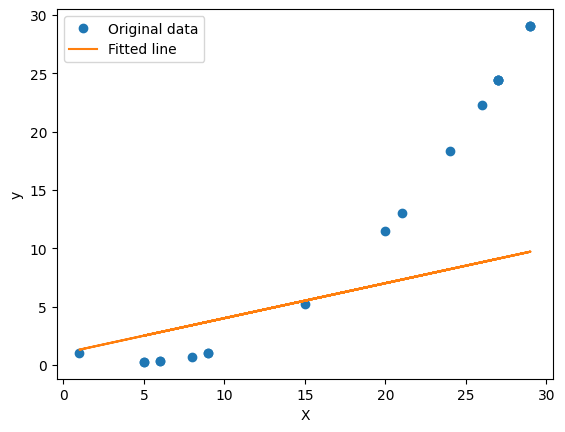

In [ ]:
y_pred = (theta * X + theta_0).flatten()

plt.plot(X, y, 'o', label='Original data')
plt.plot(X, y_pred, '-', label='Fitted line')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
X = X.reshape(-1, 1) #n x 1

In [ ]:
X.shape, theta.shape

((20, 1), (1, 1))

## **Training error (RMSE) for linear regression**

In [ ]:
n = X.shape[0]
y_pred = theta.T @ X + theta_0

ValueError: shapes (1,1) and (20,1) not aligned: 1 (dim 1) != 20 (dim 0)

`prompt: hint to write traning error of linear regression (no code)`

import numpy as np
The training error of a linear regression model is typically calculated as the mean squared error (MSE) between the predicted values (y_pred) and the actual values (y) in your training dataset.  You've already got most of the pieces:

1. **Calculate the difference between predicted and actual values:**  `y_pred - y`

2. **Square the differences:**  `(y_pred - y)**2`

3. **Sum the squared differences:** `np.sum((y_pred - y)**2)`

4. **Divide by the number of data points (n):** `1/n * ...`

You're very close with the code you've already written! The issue lies in how you're using `theta`.  You need to ensure the matrix multiplication is correctly sized and that you're adding `theta_0` correctly.  Review the dimensions of `theta` and `X`, and how you incorporate the intercept (`theta_0`).


In [ ]:
y_pred = theta.T @ X.T + theta_0

### Mistake 1: transpose X because of wrong dimension when initialized

In [ ]:
def RMSE_1(theta, theta_0, X, y):
  X = X.reshape(-1, 1) #n x 1
  y_pred = theta.T @ X.T + theta_0
  n = X.shape[0]
  mse = (1 / n) * np.sum((y_pred.flatten() - y)**2)
  return mse

# Example usage:
error = RMSE_1(theta, theta_0, X, y)
print(f"Training Error (MSE): {error}")

Training Error (MSE): 122.37075000000004


## **Direct Solution**

### Mistake 2: Careful about matrix dimension

Optimal theta of direct solution: [ 1.00229503 -5.63308956]
Validation error of direct solution:  12.238927492591925
Validation error of direct solution:  12.238927492591927


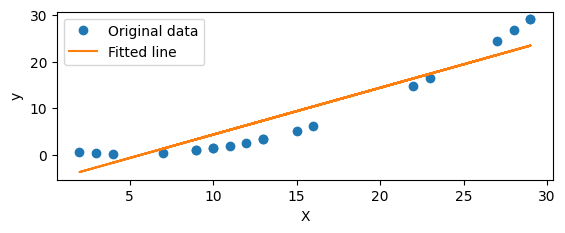


Optimal theta using numpy.linalg.lstsq: [ 1.00229503 -5.63308956]
Validation error of least square:  12.238927492591923
Validation error of least square:  12.238927492591923


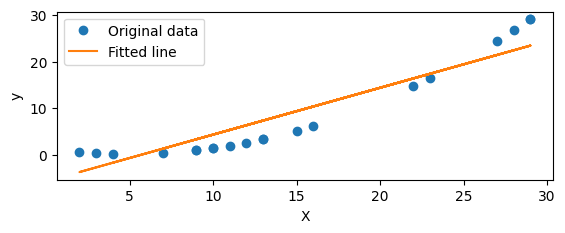

In [ ]:
#theta = X^(-1) * y
def direct_linear_regression_1(X, y):
  X = X.reshape(-1, 1)
  X_b = np.c_[X, np.ones((len(X), 1))] #1 column for theta_0
  theta_best = np.linalg.pinv(X_b) @ y
  return theta_best

#theta = (X^T @ X)^(-1) @ X^T @ y
def direct_linear_regression_2(X, y):
  X = X.reshape(-1, 1)
  X_b = np.c_[X, np.ones((len(X), 1))] #1 column for theta_0
  theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y #np.linalg.inv(X_b.T.dot(X_b)) may not be defined
  return theta_best

def RMSE_1_rewrite(theta, X, y):
  theta_0 = theta[1]
  theta = np.delete(np.array(theta), theta.shape[0]-1) #delete last column reserved for theta_0
  theta = np.array(theta)
  X = X.reshape(-1, 1) #n x 1
  n = X.shape[0]

  y_pred = theta.T @ X.T + theta_0
  mse = (1 / n) * np.sum((y_pred.flatten() - y)**2)
  return mse

#err = 1/n * (X_b @ theta - y).T @ (X_b @ theta - y)
def RMSE_2(theta, X, y):
  X = X.reshape(-1, 1) #n x d
  X_b = np.c_[X, np.ones((len(X), 1))] #1 column for theta_0
  n = X.shape[0]
  y = y.reshape(-1, 1) #n x 1
  theta = theta.reshape(-1, 1) #d * 1

  dif = X_b @ theta - y
  dif_T = dif.T
  err = (1 / n) * np.sum(dif_T @ dif)
  # print(dif)
  # print(X_b, theta, y)
  return err

# Test RMSE function with fixed X, y and theta
# print(RMSE_1_rewrite(np.array([1, 2]), np.array([[1, 3]]), np.array([1, 2])))
# print(RMSE_2(np.array([1, 2]), np.array([[1, 3]]), np.array([1, 2])))

# Training set
X = np.random.randint(1, 30, 20)
X_b = np.c_[X, np.ones((len(X), 1))]
y = f_reg(X)

# Valuation set
X_val = np.random.randint(1, 30, 20)
X_val_b = np.c_[X_val, np.ones((len(X_val), 1))]
y_val = f_reg(X_val)

# theta_best = direct_linear_regression_1(X, y)
theta_best = direct_linear_regression_2(X, y)
y_val_pred = X_val_b @ theta_best
print("Optimal theta of direct solution:", theta_best)
print("Validation error of direct solution: ", RMSE_1_rewrite(theta_best, X_val, y_val))
print("Validation error of direct solution: ", RMSE_2(theta_best, X_val, y_val))
plt.subplot(2, 1, 1)
plt.plot(X_val, y_val, 'o', label='Original data')
plt.plot(X_val, y_val_pred, '-', label='Fitted line')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Compare with the solution using numpy.linalg.lstsq (least squares)
theta_best_lstsq, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
y_val_pred = X_val_b @ theta_best_lstsq
print("\nOptimal theta using numpy.linalg.lstsq:", theta_best_lstsq.flatten())
print("Validation error of least square: ", RMSE_1_rewrite(theta_best_lstsq, X_val, y_val))
print("Validation error of least square: ", RMSE_2(theta_best_lstsq, X_val, y_val))
plt.subplot(2, 1, 2)
plt.plot(X_val, y_val, 'o', label='Original data')
plt.plot(X_val, y_val_pred, '-', label='Fitted line')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

**Same error => Correct implementation**

## Ridge

Optimal theta of linear regression: [ 1.03766286 -7.90958662]
Validation error of linear regression:  10.163245312570645


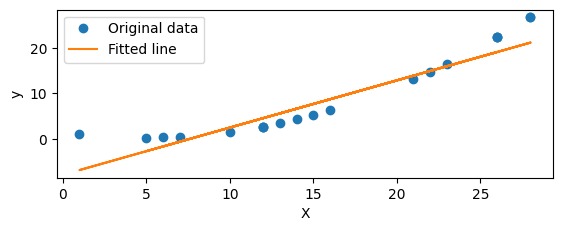


Optimal theta using ridge regression: [ 1.02444122 -6.26548574]
Validation error normal of ridge regression:  9.691265569534263
Validation error ridge of ridge regression:  10.094323483322201


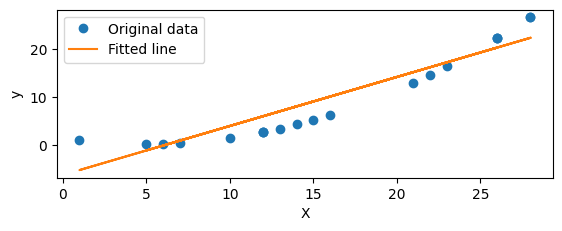

In [ ]:
#theta = (X^T x X)^(-1) x X^T x y
def direct_ridge_regression(X, y, c):
  X = X.reshape(-1, 1) #n x d
  X_b = np.c_[X, np.ones((len(X), 1))] #1 column for theta_0
  n, d = X.shape[0], X.shape[1]
  theta_best = np.linalg.inv(X_b.T @ X_b + n * c * np.identity(d)) @ X_b.T @ y #np.linalg.inv(X_b.T.dot(X_b)) may not be defined
  return theta_best

def RMSE_ridge(theta, X, y, c):
  X = X.reshape(-1, 1) #n x d
  X_b = np.c_[X, np.ones((len(X), 1))] #1 column for theta_0
  n = X.shape[0]
  y = y.reshape(-1, 1) #n x 1
  theta = theta.reshape(-1, 1) #d * 1

  dif = X_b @ theta - y
  dif_T = dif.T
  err = 1/n * np.sum(dif_T @ dif) + c * np.linalg.norm(theta)**2
  return err

X = np.random.randint(1, 30, 20)
y = f_reg(X)

X_val = np.random.randint(1, 30, 20)
X_val_b = np.c_[X_val, np.ones((len(X_val), 1))]
y_val = f_reg(X_val)

c = 0.01
theta_best_normal = direct_linear_regression_2(X, y)
y_val_pred = X_val_b @ theta_best
print("Optimal theta of linear regression:", theta_best)
print("Validation error of linear regression: ", RMSE_2(theta_best, X_val, y_val))
plt.subplot(2, 1, 1)
plt.plot(X_val, y_val, 'o', label='Original data')
plt.plot(X_val, y_val_pred, '-', label='Fitted line')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

theta_best_ridge = direct_ridge_regression(X, y, c)
y_val_pred = X_val_b @ theta_best_ridge
print("\nOptimal theta using ridge regression:", theta_best_ridge.flatten())
print("Validation error normal of ridge regression: ", RMSE_2(theta_best_ridge, X_val, y_val))
print("Validation error ridge of ridge regression: ", RMSE_ridge(theta_best_ridge, X_val, y_val, c))
plt.subplot(2, 1, 2)
plt.plot(X_val, y_val, 'o', label='Original data')
plt.plot(X_val, y_val_pred, '-', label='Fitted line')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# W3: Gradient Descent

## Batch Gradient Descent

In [ ]:
lr = 1e-3
n_epochs = 1000
theta = np.random.randn(2, 1)

X = np.random.randint(1, 30, 20).reshape(-1, 1)
X_b = np.c_[X, np.ones((len(X), 1))]
y = f_reg(X)
n = len(X_b)

def batch_gradient_descent(theta, X, y, n_epochs = 100, lr = 1e-3):
  X_b = np.c_[X, np.ones((len(X), 1))]
  for epoch in range(n_epochs):
    gradient = (2 / n) * X_b.T @ (X_b @ theta - y)
    theta = theta - lr * gradient
  return theta

def batch_gradient_descent_2(theta, X, y, lr = 1e-3, eps = 1e-10):
  prev_err, cur_err = 0, RMSE_2(theta, X, y)
  X_b = np.c_[X, np.ones((len(X), 1))]
  while cur_err - prev_err > eps:
    prev_err = cur_err
    gradient = (2 / n) * X_b.T @ (X_b @ theta - y)
    theta = theta - lr * gradient
    cur_err = RMSE_2(theta, X, y)
  return theta

print("Before: ", RMSE_2(theta, X, y))

theta_tmp = batch_gradient_descent(theta, X, y, n_epochs, lr)
print("After Batch Gradient Descent (1000 epochs): ", RMSE_2(theta_tmp, X, y))

eps = 1e-18
theta_tmp = batch_gradient_descent_2(theta, X, y, lr, eps)
print("After Batch Gradient Descent (early stopping): ", RMSE_2(theta_tmp, X, y))

Before:  19.122761730277343
After Batch Gradient Descent (1000 epochs):  10.579746406642561
After Batch Gradient Descent (early stopping):  15.095309659396856


## Stochastic Gradient Descent

In [ ]:
lr = 1e-3
n_epochs = 1000
theta = np.random.randn(2, 1)

X = np.random.randint(1, 30, 20).reshape(-1, 1)
X_b = np.c_[X, np.ones((len(X), 1))]
y = f_reg(X)
n = len(X_b)

def stochastic_gradient_descent(theta, X, y, n_epochs = 100, lr = 1e-3):
  for epoch in range(n_epochs):
    rnd_idx = np.random.randint(len(X))
    X_rnd, y_rnd = X[rnd_idx], y[rnd_idx]
    X_b_rnd = np.c_[X_rnd, np.ones((len(X_rnd), 1))]

    gradient = 2 * X_b_rnd.T @ (X_b_rnd @ theta - y_rnd)
    theta = theta - lr * gradient
  return theta

print("Before: ", RMSE_2(theta, X, y))
theta_b = batch_gradient_descent(theta, X, y, n_epochs, lr)
print("After Batch Gradient Descent (1000 epochs): ", RMSE_2(theta_b, X, y))
theta_s = stochastic_gradient_descent(theta, X, y, n_epochs, lr)
print("After Stochastic Gradient Descent (1000 epochs): ", RMSE_2(theta_s, X, y))

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-6, penalty=None, eta0=lr, n_iter_no_change=50, random_state=86)
sgd_reg.fit(X, y.ravel())
print("With sklearn SGDRegressor: ", RMSE_2(np.c_[sgd_reg.coef_, sgd_reg.intercept_].T, X, y))

Before:  18.652017831602794
After Batch Gradient Descent (1000 epochs):  5.2390666312928165
After Stochastic Gradient Descent (1000 epochs):  5.398374399599127
With sklearn SGDRegressor:  5.51230677933938


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


# W4: Classification

# Logistic Regression

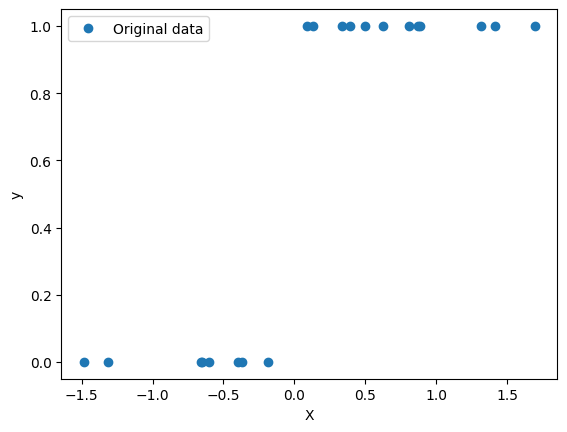

In [ ]:
theta = np.random.randn(2, 1)

def f_classify(X):
  return X > 0

X = np.random.randn(20, 1)
y = f_classify(X)
plt.plot(X, y, 'o', label='Original data')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def negll(theta, X, y):
  X_b = np.c_[X, np.ones((len(X), 1))]
  y_pred = sigmoid(X_b @ theta)
  return -np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

Before Neg log likelihood:  16.263540434372683
After Neg log likelihood:  8.141347119257597


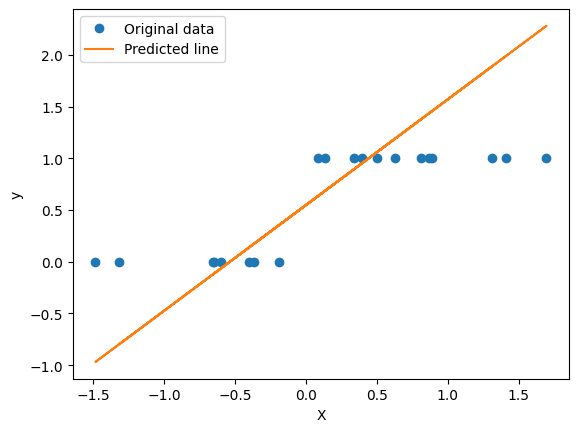

In [ ]:
c = 0.01
lr = 1e-3
n_epochs = 5000

def logistic_reg_bgd(n_epochs, lr, c, theta, X, y):
  X_b = np.c_[X, np.ones((len(X), 1))]
  n = X.shape[0]
  for epoch in range(n_epochs):
    gradient = (1 / n) * X_b.T @ (sigmoid(X_b @ theta) - y) + 2 * c * theta
    theta = theta - lr * gradient

  return theta


print("Before Neg log likelihood: ", negll(theta, X, y))
theta = logistic_reg_bgd(n_epochs, lr, c, theta, X, y)
print("After Neg log likelihood: ", negll(theta, X, y))

y_pred = np.c_[X, np.ones((len(X), 1))] @ theta
plt.plot(X, y, 'o', label='Original data')
plt.plot(X, y_pred, '-', label='Predicted line') #wrong line
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
y_true_idx = np.where(y == True)[0]
y_false_idx = np.where(y == False)[0]

threshold = 0.5
print("True positive rate:", np.sum(sigmoid(y_pred[y_true_idx]) > threshold) / len(y_true_idx))
print("True negative rate:", np.sum(sigmoid(y_pred[y_false_idx]) < threshold) / len(y_false_idx))
print("Error type I:", np.sum(sigmoid(y_pred[y_false_idx]) > threshold) / len(y_false_idx))
print("Error type II:", np.sum(sigmoid(y_pred[y_true_idx]) < threshold) / len(y_true_idx))

True positive rate: 1.0
True negative rate: 0.625
Error type I: 0.375
Error type II: 0.0


In [ ]:
def L_01(y_pred, y_true):
  return np.sum(np.abs(y_pred.astype(int) - y_true.astype(int)))

y_pred_01 = sigmoid(y_pred) > threshold
print("Accuracy of the model:", 1 - (1 / len(y_pred_01) * L_01(y_pred_01, y)))

Accuracy of the model: 0.85


# Softmax Regression

In [ ]:
from scipy import sparse

In [ ]:
dim_N = 30
dim_d = 2
dim_C = 4 #number of classes

X = np.random.randn(dim_N, dim_d)
y = np.random.randint(0, dim_C, (dim_N,))

In [ ]:
def ohe(y, dim_C = dim_C):
  y = sparse.coo_matrix((np.ones_like(y),
        (y, np.arange(len(y)))), shape = (dim_C, len(y))).toarray()
  return y

y_ohe = ohe(y, dim_C)
y_ohe.shape

(4, 30)

In [ ]:
def softmax(Z):
  """
  Z: C x n
  e_X: C x n
  """
  e_X = np.exp(Z - np.max(Z, axis = 0, keepdims = True))
  return e_X / e_X.sum(axis = 0)

def grad_loss(theta, X, y):
  """
  y_pred: C x n (C x d @ d x n)
  E: C x n
  X @ E.T: d x n @ n x C => d x C
  """
  y_pred = softmax(theta.T @ X.T)
  E = y_pred - y
  return X.T @ E.T

def multi_NLL(theta, X, y):
  y_pred = softmax(theta.T @ X.T)
  return -np.sum(y * np.log(y_pred))

#approximate using definition of derivative
def numeric_grad(theta, X, y, cost_func):
  eps = 1e-6
  g = np.zeros_like(theta)
  for i in range(theta.shape[0]):
    for j in range(theta.shape[1]):
      theta_p = theta.copy()
      theta_n = theta.copy()
      theta_p[i, j] += eps
      theta_n[i, j] -= eps
      g[i, j] = (cost_func(theta_p, X, y) - cost_func(theta_n, X, y)) / (2 * eps)

  return g

theta = np.random.randn(dim_d, dim_C)
g1a = grad_loss(theta, X, y_ohe)
g2a = numeric_grad(theta, X, y_ohe, multi_NLL)

print(np.linalg.norm(g1a - g2a))

7.382820351801554e-09


In [ ]:
def softmax_reg_bgd(n_epochs, lr, theta, X, y_ohe):
  X_b = np.c_[X, np.ones((len(X), 1))]
  n = X.shape[0]
  for epoch in range(n_epochs):
    gradient = grad_loss(theta, X, y_ohe)
    theta = theta - lr * gradient

  return theta

n_epochs = 3000
lr = 1e-3
X = np.random.randn(dim_N, dim_d)
y = np.random.randint(0, dim_C, (dim_N,))
y_ohe = ohe(y, dim_C)
theta = np.random.randn(dim_d, dim_C)

print("Before Gradient Descent:", multi_NLL(theta, X, y_ohe))
theta = softmax_reg_bgd(n_epochs, lr, theta, X, y_ohe)
print("After Gradient Descent:", multi_NLL(theta, X, y_ohe))

acc = []
for i in range(X.shape[0]):
  y_pred = softmax(theta.T @ X[i].T).argmax()
  if(y_pred == y[i]):
    acc.append(i)

print(len(acc) / X.shape[0])

Before Gradient Descent: 58.58632746919426
After Gradient Descent: 38.699288634663965
0.43333333333333335


# W6: Neural Network (Incomplete)

## Method 1:

In [ ]:
n_layers = 2
dim_N = 50
dim_d = 3
n_epochs = 500
lr = 1e-3

X = np.random.randn(dim_N, dim_d)
y = 0.769 * X**2 - 2 * X + 1 + np.random.randn(dim_N)

def ReLU(Z):
  return np.max(0, Z)

def RMSE(y_pred, y_true):
  return np.sqrt(np.mean(y_true - y_pred))

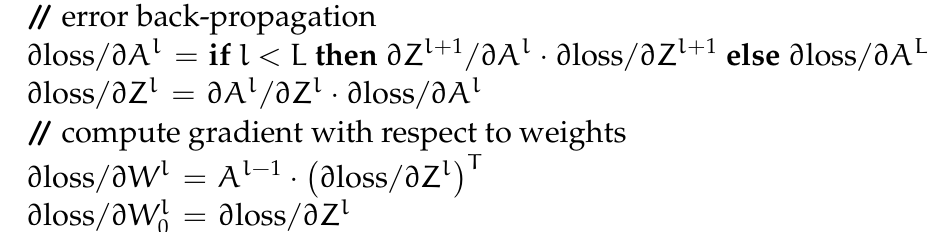

In [ ]:
W = np.random.randn(n_layers+1, dim_N, dim_d)
W0 = np.random.randn(n_layers+1, dim_N)

def NeuralNet_SGD(n_layers, n_epochs, lr = 1e-3, activation_func, loss_func, W, W0, X, y):
  for epoch in range(n_epochs):
    rand_idx = np.random.randint(X.shape[0])
    A = np.random.randn(n_layers)
    A[0] = X[rand_idx]
    for l in range(1, n_layers):
      y_pred = W[l,].T @ A[l-1] + W0[l,]
      A[l] = activation_func(y_pred)

    train_loss = loss_func(A[n_layers], y[rand_idx])
    loss_to_A = 0
    loss_to_Z = 0
    loss_to_W = 0
    loss_to_W0 = 0
    print(train_loss)
    for l in range(n_layers, 1, -1):
      #Error back-propagation
      loss_to_A = 0#...
      loss_to_Z = loss_to_A * 0#...
      #Compute gradient with respect to weights
      loss_to_W = A[l-1] * loss_to_Z.T
      loss_to_W0 = loss_to_Z
      #SGD update
      W[l,] = W[l,] - lr * loss_to_W
      W0[l,] = W0[l,] - lr * loss_to_W0

    return W, W0

NeuralNet_SGD(n_layers, n_epochs, lr, ReLU, RMSE, W, W0, X, y)

## Method 2:

In [ ]:
X = np.random.randn(30, 1)
y = 0.639 * X**2 - 8 * X + np.random.randn(30, 1)

In [ ]:
class NeuralNetwork:
  '''
  Dimensions:
  +) X: N x 1
  +) y: N x 1

  +) weights: n_layers x (input_dim x output_dim)
  +) bias: n_layers x (output_dim)
  +) Z: n_layers x (output_dim x 1)
  +) A: n_layers x (output_dim x 1)
  +) loss: n_layers x (1)

  '''
  def __init__(self, learning_rate):
    self.learning_rate = learning_rate

    self.weights = [0] # L x input_dim x output_dim
    self.bias = [0] # L x input_dim
    self.dW = self.dW0 = 0

    self.n_layers = 0
    self.input_dim = [0] # L
    self.output_dim = [0] # L

  def ReLU(self, Z):
    return np.max(0, Z)

  def loss_func(self, y_pred, y_true):
    return np.mean((y_pred - y_true))**2

  def add_layer(self, input_dim, output_dim):
    self.n_layers = self.n_layers + 1
    self.input_dim.append(input_dim)
    self.output_dim.append(output_dim)
    self.weights.append(np.random.randn(input_dim, output_dim))
    self.bias.append(np.random.randn(output_dim, 1))

  def forward(self, X):
    #forward
    self.Z = [X]
    self.A = [0]
    print(len(self.Z), len(self.Z[0]), len(self.Z[0][0]))
    print(np.asarray(self.Z).shape, np.asarray(self.Z).shape)
    for l in range(1, self.n_layers):
      print(l, ": ", np.asarray(self.weights[l].T).shape, " ", np.asarray(self.Z[l-1]).shape, " ", np.asarray(self.bias[l]).shape)
      self.Z.append(self.weights[l].T @ self.Z[l-1] + self.bias[l])
      print(np.asarray(self.Z[l].flatten()).shape)
      self.A.append(self.ReLU(self.Z[l]))
      print("shape of ")
      print(np.asarray(self.A[l]).shape)

    return self.A[self.n_layers]

  def backward(self, train_loss, X, y):
    #backward
    loss = np.random.randn(n_layers+1, 1)
    loss[n_layers] = train_loss
    for l in range(self.n_layers, 1, -1):
      if(l < self.n_layers):
        loss[l] = self.weights[l+1].T * loss[l+1] * (self.Z[l] > 0) #derivative of ReLU(Z[l])
      else:
        loss[l] = self.weights[l+1].T * loss[l+1]

      self.dW = loss[l] @ self.A[l-1].T
      self.dW0 = loss[l]

  def update_weights(self):
    #update weights
    self.weights = self.weights - self.learning_rate * self.dW
    self.bias = self.bias - self.learning_rate * self.dW0

  def train(self, X, y, n_epochs):
    if(self.n_layers == 0):
      print("No layers added")
      return

    if not self.weights:
      self.weights.append(np.random.randn(X.shape[1], y.shape[1]))
      self.bias.append(np.random.randn(y.shape[1]))
    #training
    print("Training...")
    for epoch in range(n_epochs):
      loss = []
      print("  Fowarding...")
      train_loss = self.loss_func(self.forward(X), y)
      loss.append(train_loss)
      print("  Backwarding...")
      self.backward(train_loss, X, y)
      print("  Weight updating...")
      self.update_weights()
      print(f"Epoch {epoch}/{n_epochs}: loss =", np.mean(loss))

  def predict(self, X):
    y_pred = self.weights.T @ X + self.bias
    return y_pred


In [ ]:
custom_nn = NeuralNetwork(learning_rate = 1e-3)
custom_nn.add_layer(X.shape[0], 25)
custom_nn.add_layer(25, y.shape[1])

In [ ]:
custom_nn.train(X, y, n_epochs = 2)

Training...
  Fowarding...
1 30 1
(1, 30, 1) (1, 30, 1)
1 :  (25, 30)   (30, 1)   (25, 1)
(25,)


TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
# y_pred = custom_nn.predict(X)
# y_pred

# W8